# Iris Flower - Batch Prediction


In this notebook we will, 

1. Load the batch inference data that arrived in the last 24 hours
2. Predict the first Iris Flower found in the batch
3. Write the ouput png of the Iris flower predicted, to be displayed in Github Pages.

In [1]:
import pandas as pd
import hopsworks
import joblib

project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/398
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
mr = project.get_model_registry()
model = mr.get_model("iris", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")

Connected. Call `.close()` to terminate connection gracefully.

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training. 

So, let's download the iris dataset, and preview some rows. 

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [3]:
feature_view = fs.get_feature_view(name="iris", version=1)

Now we will do some **Batch Inference**. 

We will read all the input features that have arrived in the last 24 hours, and score them.

In [4]:
import datetime
from PIL import Image

batch_data = feature_view.get_batch_data()

y_pred = model.predict(batch_data)

y_pred

2022-09-14 08:45:00,684 INFO: USE `dowlingj_featurestore`
2022-09-14 08:45:01,704 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`
FROM `dowlingj_featurestore`.`iris_1` `fg0`


array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor',
      

In [5]:
batch_data

,sepal_length,sepal_width,petal_length,petal_width
0,7.335088,3.547577,4.567607,1.693289
1,4.900000,3.600000,1.400000,0.100000
2,5.700000,2.500000,5.000000,2.000000
3,5.700000,3.000000,4.200000,1.200000
4,6.700000,3.300000,5.700000,2.100000
...,...,...,...,...
152,5.560206,3.293820,5.825793,1.598256
153,5.025268,2.176264,4.495605,1.260169
154,5.434429,2.801191,3.722068,1.432124
155,5.356446,4.129695,1.731965,0.565516


In [6]:
y_pred = model.predict(batch_data)
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor',
      

Batch prediction output is the last entry in the batch - it is output as a file 'latest_iris.png'

In [7]:
flower = y_pred[y_pred.size-1]
flower_img = flower + ".png"
img = Image.open(flower_img)            

img.save("latest_iris.png")

In [8]:
iris_fg = fs.get_feature_group(name="iris", version=1)
df = iris_fg.read()
df

2022-09-14 08:45:15,220 INFO: USE `dowlingj_featurestore`
2022-09-14 08:45:16,243 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`, `fg0`.`variety` `variety`
FROM `dowlingj_featurestore`.`iris_1` `fg0`


,sepal_length,sepal_width,petal_length,petal_width,variety
0,7.335088,3.547577,4.567607,1.693289,Virginica
1,4.900000,3.600000,1.400000,0.100000,Setosa
2,5.700000,2.500000,5.000000,2.000000,Virginica
3,5.700000,3.000000,4.200000,1.200000,Versicolor
4,6.700000,3.300000,5.700000,2.100000,Virginica
...,...,...,...,...,...
152,5.560206,3.293820,5.825793,1.598256,Virginica
153,5.025268,2.176264,4.495605,1.260169,Versicolor
154,5.434429,2.801191,3.722068,1.432124,Versicolor
155,5.356446,4.129695,1.731965,0.565516,Setosa


In [9]:
label = df.iloc[-1]["variety"]
label

'Virginica'

In [10]:
label_flower = label + ".png"

img = Image.open(label_flower)            

img.save("actual_iris.png")

In [11]:
from datetime import datetime
now = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")

# Hack to ensure gh-action doesn't fail if the same image is predicted twice in a row
# If no files have changed, the 'git commit/push' stage would fail. 
# This updated timestamp file ensures git commit/push will succeed, as it is always updated 
with open('iris-prediction-time.txt', 'w') as f:
    f.write(now)

In [12]:
import pandas as pd

data = {
    'prediction': [flower],
    'label': [label],
    'datetime': [now],
}
monitor_df = pd.DataFrame(data)

monitor_fg = fs.get_or_create_feature_group(name="iris_predictions",
                                  version=1,
                                  primary_key=["datetime"],
                                  description="Iris flower Prediction/Outcome Monitoring"
                                 )
monitor_fg.insert(monitor_df)

Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/398/jobs/named/iris_predictions_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f378a6f0c70>, None)

In [13]:
history_df = monitor_fg.read()
history_df

2022-09-14 08:46:10,110 INFO: USE `dowlingj_featurestore`
2022-09-14 08:46:11,256 INFO: SELECT `fg0`.`prediction` `prediction`, `fg0`.`label` `label`, `fg0`.`datetime` `datetime`
FROM `dowlingj_featurestore`.`iris_predictions_1` `fg0`


,prediction,label,datetime
0,Versicolor,Versicolor,"09/14/2022, 08:31:22"
1,Setosa,Setosa,"09/14/2022, 08:43:06"
2,Virginica,Virginica,"09/14/2022, 08:45:18"


In [17]:
from sklearn.metrics import confusion_matrix

predictions = history_df[['prediction']]
labels = history_df[['label']]

results = confusion_matrix(labels, predictions)
print(results)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [18]:
from matplotlib import pyplot
import seaborn as sns

df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                     ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

df_cm

,Pred Setosa,Pred Versicolor,Pred Virginica
True Setosa,1,0,0
True Versicolor,0,1,0
True Virginica,0,0,1


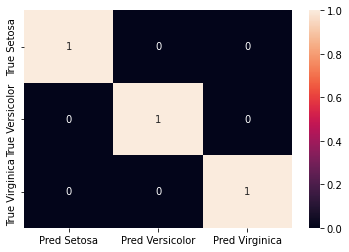

In [19]:
cm = sns.heatmap(df_cm, annot=True)

fig = cm.get_figure()
fig.savefig("confusion-matrix.png") 